# Исследование объявлений о продаже квартир

__Цель исследования:__ используя данные сервиса Яндекс.Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет), определить рыночную стоимость объектов недвижимости и типичные параметры квартир.Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

__Выполненные задачи в рамках проекта:__
- определены  и заполнены пропущенные значения;
- приведены данные к нужным типам;
- посчитаны и добавлены в таблицу необходимые показатели для анализа (цена квадратного метра, день недели, месяц и год публикации объявления и другие);
- избавляемся в данных от выбросов на основе построения боксплотов и диаграмм рассеивания;
- проведен анализ факторов влияющих на стоимость квартиры с помощью построения гистограмм;
- проанализируем стоимость недвижимости в 10 населённых пунктов с наибольшим числом объявлений и в центре Санкт-Петербурга;
- подготовлены выводы на основе проведенного анализа.

## Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">Шаг 1. Откройте файл с данными и изучите общую информацию.</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">Шаг 2. Предобработка данных</a></li>
    <li><a style="text-decoration: none" href="#table">Шаг 3. Посчитайте и добавьте в таблицу.</a></li>
    <li><a style="text-decoration: none" href="#research_analysis">Шаг 4. Проведите исследовательский анализ данных и выполните инструкции.</a></li>
    <li><a style="text-decoration: none" href="#conclusion">Шаг 5. Общий вывод</a></li>
</ul>

# Откройте файл с данными и изучите общую информацию. <a name="introduction"></a> 

Импортируем все внешние библиотеки

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

В файле выявили проблему, отсутствие разделителей, исправляем эту ошибку

In [2]:
realty_data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

Проверяем на отсутствие пропусков

In [3]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Просмотрим некоторыe основные статистические данные, таких как процентиль, среднее значение, стандартное отклонение в таблице

In [4]:
realty_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
realty_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


__Вывод__:

Всего в таблице 22 столбца, из которых 14 относятся к количественным данным, 2 к логическим данным, а 3 к категориальным. Каждая строка таблицы содержит информацию о квартире, а именно информацию о цене квартиры, общей площади, площади кухни, жилой площади, количестве комнат, этажности квартиры, расположенность ее от центра, до ближайшего аэропорта, расстояние до центра города и другие характеристики квартиры.   
При этом первоначальный анализ показал, что в таблице существуют пропущенные значения в следующих столбцах: ceiling_height,living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition. 
Данную проблему надо будет решать в дальнейшем.

#  Предобработка данных <a name="data_pre-processing"></a>

Начинаем заполнять столбец ceiling_height. В данном столбце пустые значения заменяем на медианное значение, так как зависимость между другими данными не удалось выявить

In [6]:
height_median = realty_data['ceiling_height'].median()
realty_data['ceiling_height'].fillna(height_median, inplace=True)

In [7]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В связи с тем, что статистический анализ показал, что существует в столбце rooms значение 0, что невозможно, то была составлена сводная таблица, которая показала, что у квартир со значение 0 жилая площадь близка 1

In [8]:
realty_data.pivot_table(index='rooms', values="living_area", aggfunc="median")

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


На основе этого, значения 0 были заменены на 1

In [9]:
realty_data.loc[realty_data['rooms'] == 0, 'rooms'] = 1

Пишем функцию, которая ищет медиану среди заданной категории в столбце и дальше производим замену пропущенных значений на полученное значение в таблице

In [10]:
def missing_data(data, array, column):
    for row in array:
        data_value = data[data['rooms'] == row][column].median()
        data.loc[data['rooms'] == row, column] =  data[data['rooms'] == row][column].fillna(data_value)

Cоздаем массив для значений столбца 'rooms' для использования ее в функции

In [11]:
value_missing = realty_data['rooms'].unique()

In [12]:
realty_data.query("616 <= days_exposition <= 700")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,2.65,5.0,104.0,4,NaN,...,17.0,NaN,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
248,7,4100000.0,31.00,2015-08-02T00:00:00,1,3.00,17.0,10.0,6,False,...,NaN,0.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,NaN,637.0
274,9,4318000.0,37.55,2016-02-29T00:00:00,1,2.65,14.0,15.2,10,NaN,...,8.9,2.0,Санкт-Петербург,22098.0,23810.0,0.0,NaN,2.0,100.0,694.0
346,5,2100000.0,48.20,2016-08-18T00:00:00,3,2.50,5.0,33.6,5,NaN,...,5.5,1.0,деревня Оржицы,NaN,NaN,NaN,NaN,NaN,NaN,635.0
383,8,5800000.0,66.00,2016-07-28T00:00:00,3,2.70,9.0,42.0,8,NaN,...,8.5,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23287,8,5500000.0,80.60,2015-07-29T00:00:00,3,2.60,18.0,42.9,17,NaN,...,18.2,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,679.0
23494,10,3700000.0,45.30,2016-08-30T00:00:00,2,2.50,5.0,31.0,2,NaN,...,6.3,1.0,Санкт-Петербург,42320.0,14824.0,1.0,261.0,0.0,NaN,676.0
23627,11,6300000.0,42.30,2017-01-27T00:00:00,1,2.65,10.0,16.3,4,NaN,...,12.0,2.0,Санкт-Петербург,17313.0,7963.0,0.0,NaN,0.0,NaN,616.0
23648,14,10100000.0,78.00,2017-05-12T00:00:00,3,3.27,5.0,48.6,5,NaN,...,8.2,NaN,Санкт-Петербург,20933.0,1113.0,1.0,621.0,2.0,117.0,621.0


Применяем функцию меняющую пропущенные значения в столбце "living_are" на медиану значений по столбцу "rooms"

In [13]:
missing_data(realty_data, value_missing, "living_area")

Проверяем заменились ли у нас значения

In [14]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Проверяем пропуски в столбце "is_apartment"

In [15]:
realty_data["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Предполагаем, что если встречаются пропущенные значения, то значит это не апартаменты, так как их немного в таблице,  поэтому заменяем пропущенные значения на False

In [16]:
realty_data["is_apartment"].fillna(False, inplace=True)

Заменяем пропущенные значения в столбце "kitchen_area" на разнице между общей площадью и жилой площадью 

In [17]:
difference_area = realty_data["total_area"] - realty_data["living_area"]
realty_data["kitchen_area"].fillna(difference_area, inplace=True) 

Проверяем много ли у нас значений, где площадь кухни меньше 2 кв. метров, что невозможно в принципе, всего таких данных 39

In [18]:
realty_data.loc[realty_data["kitchen_area"] < 2, "kitchen_area"].count()

39

Так как таких данных немного, а они неправильные, удаляем их

In [19]:
realty_data = realty_data.drop(realty_data[realty_data.kitchen_area < 2].index).reset_index(drop=True)

Проверяем удалились ли данные

In [20]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660 entries, 0 to 23659
Data columns (total 22 columns):
total_images            23660 non-null int64
last_price              23660 non-null float64
total_area              23660 non-null float64
first_day_exposition    23660 non-null object
rooms                   23660 non-null int64
ceiling_height          23660 non-null float64
floors_total            23574 non-null float64
living_area             23660 non-null float64
floor                   23660 non-null int64
is_apartment            23660 non-null bool
studio                  23660 non-null bool
open_plan               23660 non-null bool
kitchen_area            23660 non-null float64
balcony                 12175 non-null float64
locality_name           23611 non-null object
airports_nearest        18134 non-null float64
cityCenters_nearest     18157 non-null float64
parks_around3000        18158 non-null float64
parks_nearest           8071 non-null float64
ponds_around3000

Меняем все значения в столбце "balcony" на 0, так как предполагаем, что пропущенное значение означает, что нет балкона

In [21]:
realty_data["balcony"].fillna(0, inplace=True)

После проверки всех столбцев, значения по которым получены картографическим способом, мною был сделан вывод, что данные были пропущены, так как их не было, а именно все объекты оценки не находятся в городе Санкт-Петербурге, поэтому  данных по ним не было предусмотрено. Поэтому такие значения были заменены на 0. 

In [22]:
realty_data[realty_data["airports_nearest"].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,17.60,2,False,...,15.20,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23653,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23656,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23657,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,...,27.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
realty_data.fillna({'airports_nearest':0, 'cityCenters_nearest':0, 'parks_around3000': 0, 'parks_nearest': 0, 'ponds_around3000': 0, 'ponds_nearest': 0}, inplace=True)

In [24]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660 entries, 0 to 23659
Data columns (total 22 columns):
total_images            23660 non-null int64
last_price              23660 non-null float64
total_area              23660 non-null float64
first_day_exposition    23660 non-null object
rooms                   23660 non-null int64
ceiling_height          23660 non-null float64
floors_total            23574 non-null float64
living_area             23660 non-null float64
floor                   23660 non-null int64
is_apartment            23660 non-null bool
studio                  23660 non-null bool
open_plan               23660 non-null bool
kitchen_area            23660 non-null float64
balcony                 23660 non-null float64
locality_name           23611 non-null object
airports_nearest        23660 non-null float64
cityCenters_nearest     23660 non-null float64
parks_around3000        23660 non-null float64
parks_nearest           23660 non-null float64
ponds_around300

Пропущенные значения в столбце "days_exposition" решил заменить на разницу между сегодняшним числом и датой размещения объявления, так как по моему мнению пропуски были обусловлены тем, что объявления еще не сняты, то есть они еще висят, но в тоже время нельзя было оставлять пропущенные значения

In [25]:
time_now = pd.datetime.now() 
realty_data["first_day_exposition"] = realty_data["first_day_exposition"].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
difference_days = time_now - realty_data["first_day_exposition"]
difference_days = difference_days.apply(lambda x: x.total_seconds()/86400)
realty_data["days_exposition"].fillna(difference_days, inplace=True)


Остались пропуски в столбце "locality_name" и "floors_total", но так их значения не значительны, то принял решения убрать их из таблицы

In [26]:
realty_data = realty_data.dropna().reset_index(drop= True)


Проверяем все ли заменены пропуски

In [27]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23526 entries, 0 to 23525
Data columns (total 22 columns):
total_images            23526 non-null int64
last_price              23526 non-null float64
total_area              23526 non-null float64
first_day_exposition    23526 non-null datetime64[ns]
rooms                   23526 non-null int64
ceiling_height          23526 non-null float64
floors_total            23526 non-null float64
living_area             23526 non-null float64
floor                   23526 non-null int64
is_apartment            23526 non-null bool
studio                  23526 non-null bool
open_plan               23526 non-null bool
kitchen_area            23526 non-null float64
balcony                 23526 non-null float64
locality_name           23526 non-null object
airports_nearest        23526 non-null float64
cityCenters_nearest     23526 non-null float64
parks_around3000        23526 non-null float64
parks_nearest           23526 non-null float64
ponds_a

Заменим вещественный тип данных на целочисленный в строчках "days_exposition", "floors_total", "balcony" и "last_price".
При этом проверка показала, что тип столбца "is_apartment" заменился на логистический тип. 

In [28]:
realty_data["days_exposition"] = realty_data["days_exposition"].astype("int")
realty_data["floors_total"] = realty_data["floors_total"].astype("int")
realty_data["balcony"] = realty_data["balcony"].astype("int")
realty_data["last_price"] = realty_data["last_price"].astype("int")

__Вывод__
<br>

<div>Как предполагалось ранее пропуски были найдены в 12 столбцах. Причинами пропусков можно выделить следующие:
- объект объявления не обладал необходимыми данными характеристими и их просто забыли заполнить, например часть пропусков была в столбце balcon, что говорило о том, что у квартиры отсутвуют балконы. Также это относится к данным, которые получены картографическим способом, так как значения пропущены в объектах объявления, которые не находятся в городе Санкт-Петербурге.
- данные были еще не получены, например, пропуски в столбце "days_exposition" говорили о том, что объявления еще не сняты, то есть они еще висят, но в тоже время нельзя было оставлять пропущенные значения, поэтому было принято решение заменить пропуски на разницу между сегодняшним числом и датой размещения объявления.
- невнимательность тех кто вводил данные, в некоторых местах пропуски связаны в первую очередь с человеческим фактором, как например отсутвовала высота потолков по ряду объектов или их местарасположение, скорее всего просто люди при создания объявления забывали указать данные параметры. </div>

Проблема заполнения пропущенных значений в данных столбцах, решалась следующим способом:
- <b>замена на 0 или False</b>, где не было выявлено закономерностей и было выдвинуто предположение, что здесь пропуски означают нулевое значение, к таким столбцам относятся airports_nearest, cityCenters_neares, parks_around3000, parks_neares ponds_around3000 и is_apartment.
- <b>замена на медиану значений</b>, в данном случае это столбец ceiling_height.
- <b>замена на медиану значений с разбивкой на категории</b>, в данном случае это столбец living_area, так как пропушенные значения заменялись на медиану по количеству комнат.
- <b>замену на разницу между данными</b>, к данному типу относится столбец "days_exposition" (разница между сегодняшним числом и датой размещения объявления) и "kitchen_area" (разница между общей площадью и жилой площадью).
- <b>удаление столбцов</b>, это столбцы "locality_name" и "floors_total" и где значения kitchen_area меньше 2 кв. м.

Всего было удалено 173 ячейки, что составляет 0,7% от данных таблицы.

# Посчитайте и добавьте в таблицу <a name="table"></a>

Посчитываем и добавляем в таблицу цену квадратного метра.

In [29]:
realty_data["price_metre"] = realty_data["last_price"] / realty_data["total_area"]
realty_data["price_metre"] = realty_data["price_metre"].astype("int")

Посчитываем и добавляем в таблицу день недели, месяц и год публикации объявления.

In [30]:
realty_data['year'] = realty_data['first_day_exposition'].dt.year
realty_data['weekday'] = realty_data['first_day_exposition'].dt.weekday
realty_data['month'] = realty_data['first_day_exposition'].dt.month

Сделал функцию, которая категоризирует количество этажей на следующие группы "первый этаж", "последний" и "другое".

In [31]:
def total_floor(row):
    
    if row["floor"] == 1:
         return "первый этаж"
    elif row["floor"] == row["floors_total"]:
        return "последний"
    return "другое"

realty_data['floor_category'] = realty_data.apply(total_floor, axis=1)

In [32]:
realty_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metre,year,weekday,month,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,852,120370,2019,3,3,другое
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,0.0,0.0,81,82920,2018,1,12,первый этаж
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785,2015,3,8,другое
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,False,...,2.0,84.0,3.0,234.0,424,408176,2015,4,7,другое
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000,2018,1,6,другое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,1.0,796.0,3.0,381.0,1568,72490,2017,1,3,другое
23522,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0.0,0.0,0.0,0.0,45,52542,2018,0,1,другое
23523,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0.0,0.0,0.0,0.0,1241,44091,2018,6,2,первый этаж
23524,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,2.0,173.0,3.0,196.0,602,149511,2017,1,3,другое


Посчитываем и добавляем в таблицу соотношение жилой и общей площади.

In [33]:
realty_data["ratio_area"] = realty_data["living_area"] / realty_data["total_area"]

Посчитываем и добавляем в таблицу соотношение площади кухни к общей.

In [34]:
realty_data["ratio_area1"] = realty_data["kitchen_area"] / realty_data["total_area"]

In [35]:
realty_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metre,year,weekday,month,floor_category,ratio_area,ratio_area1
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,852,120370,2019,3,3,другое,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,81,82920,2018,1,12,первый этаж,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558,92785,2015,3,8,другое,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3.0,234.0,424,408176,2015,4,7,другое,0.283019,0.716981
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000,2018,1,6,другое,0.320000,0.410000


__Вывод__

Были посчитаны и добавлены в таблицу:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

# Проведите исследовательский анализ данных и выполните инструкции: <a name="research_analysis"></a>

## Задача 1 
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

###### Гистограмма 1.1. Гистограмма распределения общей площади
Исходя из построенной гистограммы, можно сделать вывод, что больше всего квартир с площадью от 35 кв. метров до 50 кв. метров, средний диапозон попадают квартиры от 50 кв. метров до 80 кв. м., после этого количество квартир, в которых общая площадь больше 80 кв. метров, резко снижается, после 110 кв. метров, можно говорить, что квартир не очень много в представленном списке. 

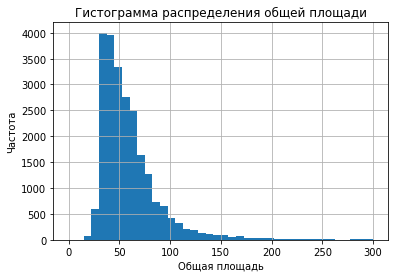

In [36]:
realty_data.hist("total_area", bins=40, range=(0, 300))
plt.title("Гистограмма распределения общей площади")
plt.xlabel("Общая площадь")
plt.ylabel("Частота");

##### Гистограмма 1.2. Гистограмма распределения  цен квартир
Исходя из построенной гистограммы, можно сделать вывод, что цена за квартиру в среднем составляют чуть больше 3,5 млн. рублей. После 5 млн. рублей идет скачок вниз. Здесь можно говорить, что квартиры стоимстью 15 млн. рублей являются очень редкими.

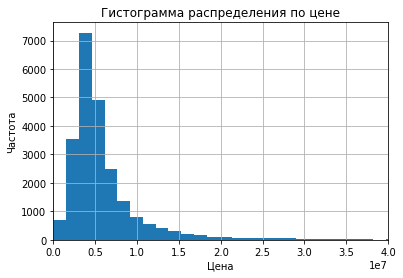

In [37]:
realty_data.hist("last_price", bins=500)
plt.xlim(0,40000000)
plt.title("Гистограмма распределения по цене")
plt.xlabel("Цена")
plt.ylabel("Частота");

##### Гистограмма 1.3. Гистограмма распределения по комнатам
Исходя из построенной гистограммы, можно сделать вывод, что большая часть квартир являются однокомнатными (больше 8 тыс. ед.) и двухкомнатными (больше 7,8 тыс. ед), реже встречаются трехкомнатные квартиры (чуть меньше 6 тыс. ед.), при этом четверокомнатные квартиры уже являются редкостью.

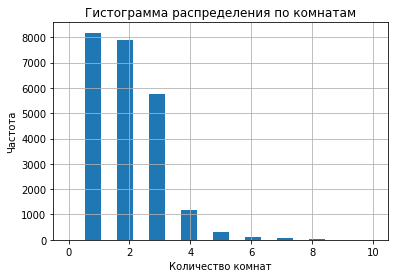

In [38]:
realty_data.hist("rooms", bins=19, range=(0, 10))
plt.title("Гистограмма распределения по комнатам")
plt.xlabel("Количество комнат")
plt.ylabel("Частота");

##### Гистограмма 1.4. Гистограмма распределения по высоте потолка
Исходя из построенной гистограммы, можно сделать вывод, что высота потолка в среднем составляет 2,7 метра, что в целом неудивительно, это довольно таки частый размер высоты потолка.

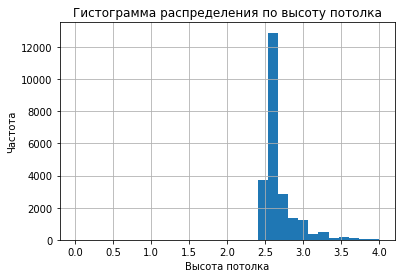

In [39]:
realty_data.hist("ceiling_height", bins=30, range=(0, 4))
plt.title("Гистограмма распределения по высоту потолка")
plt.xlabel("Высота потолка")
plt.ylabel("Частота");

__Выводы:__
Таким образом можно сделать "средний" портрет квартиры:
- небольшая квартира однокомнатная или двухкомнатная;
- площадь 45 кв. м. - 65 кв. метров;
- высота потолков - 2,7 метра;
- стоимость колеблется от 4 млн. до 5,5 млн. рублей.



## Задача 2 
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Построим диаграмму размаха, на котором видно, что большая часть значений лежит меньше чем 400 дней, что в целом скорей всего соотвествует действительности. Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 800 дней — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас очень много.
И всё же значения, которые отсёк верхний «ус» — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

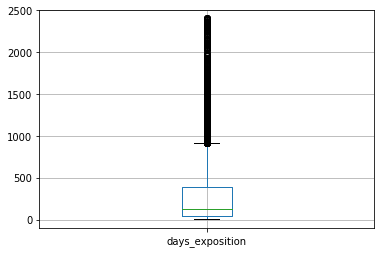

In [40]:
realty_data.boxplot("days_exposition")
plt.ylim(-100, 2500);

Медиана составляет 124 дня, среднее значение - 267, то есть разброс довольно таки большой среди значений.

In [41]:
realty_data["days_exposition"].describe()

count    23526.000000
mean       293.019298
std        367.623270
min          1.000000
25%         45.000000
50%        124.000000
75%        391.000000
max       2413.000000
Name: days_exposition, dtype: float64

__Выводы:__
Таким образом в целом можно говорить, о том, что быстрая продажа квартиры считается, если квартира уходит до 45 дней, от 45 дней до 124 дней это считается довольно таки неплохим результатом. Долго квартира продается если объявление стоит больше 391 день, а аномально долго если больше 800 дней.

## Задача 3
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

###### Гистограмма 3.1. Гистограмма распределения по дням размещения объявления
В целом можем констатировать, что наибольший пик приходится на 7, 45, 60 и 90 дней, затем происходит плавное падение и всплески замечены после 600 дней, что связано в первую очередь, что пик по многим квартирам, которые были не проданы до сегодняшнего момента (по ним были заменены  пропущенные значения), приходится на этот диапазон, так как такие всплески образовались после замены пропущенных значений.

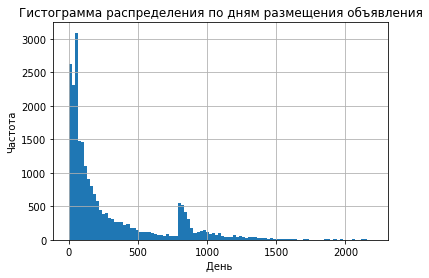

In [42]:
realty_data.hist("days_exposition", bins=100, range=(0, 2200))
plt.title("Гистограмма распределения по дням размещения объявления")
plt.xlabel("День ")
plt.ylabel("Частота");

In [43]:
realty_data["days_exposition"].value_counts() 

45      869
60      538
7       233
30      208
90      199
       ... 
1318      1
1366      1
1382      1
1398      1
1383      1
Name: days_exposition, Length: 1538, dtype: int64

Исходя из полученных значений можно констатировать, что скорее всего выбросами можно считать 7 и 45 дней, поэтому мы убрали эти значения из таблицы. Мною было принято решение не трогать 30, 60 и 90 дней, так как скорей всего объявление размещается на месяц, поэтому логично, что люди просто не снимают объявления, даже если квартира уже продана или хозяин передумал продавать ее и оно автоматически закрывается в конце месяца, так что неудивительно, что на конец месяца приходится аномально большое количество закрытий объявлений. После 600 дней тоже не стал трогать, так как исхожу из того факта, что скорей всего это является пиком для квартир, которые еще не проданы и объявления по которым стоят. В целом были убраны из таблицы значения более 900 дней, так как они согласно диаграмме размаха относятся к выбросам.

###### Гистограмма 3.3. Гистограмма распределения по высоте потолка.
В основном высота потолка в среднем по квартирам 2,7 метров. В целом можно отнести выбросы после 3,5 метров, так как таких квартир очень мало.

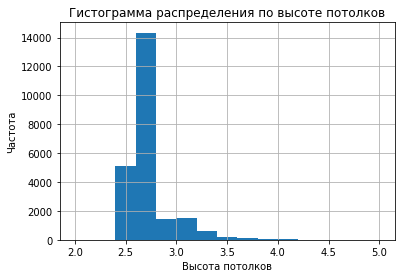

In [44]:
realty_data.hist("ceiling_height", bins=15, range=(2, 5));
plt.title("Гистограмма распределения по высоте потолков")
plt.xlabel("Высота потолков")
plt.ylabel("Частота");

###### Гистограмма 3.4. Гистограмма распределения по стоимости.
В основном большая часть квартир стоит около 5 млн. рублей. Отбросим из выборки квартиры стоимостью меньше 1,5 млн. рублей и квартиры, которые стоят больше 17 млн. рублей, так как таких квартир немного.

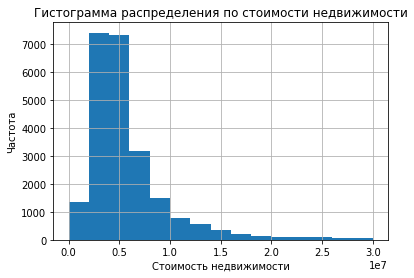

In [45]:
realty_data.hist("last_price", bins=15, range=(0, 30000000));
plt.title("Гистограмма распределения по стоимости недвижимости")
plt.xlabel("Стоимость недвижимости")
plt.ylabel("Частота");

###### Гистограмма 3.3. Гистограмма распределения по общей площади.
В основном большая часть квартир площадью около 50 кв. м. Отбросим квартиры, у которых общая площадь превышает 170 кв. метров, так как таких квартир не очень много.

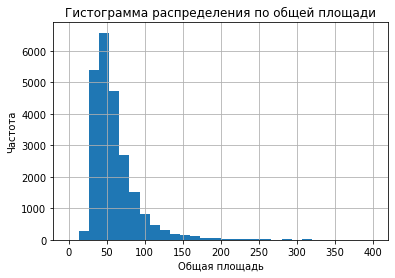

In [46]:
realty_data.hist("total_area", bins=30, range=(0, 400));
plt.title("Гистограмма распределения по общей площади")
plt.xlabel("Общая площадь")
plt.ylabel("Частота");

Создаем новую таблицу в которой отбрасываем все ненужные нам для анализа выбросы

In [47]:
outlier = [7, 45]
good_data = realty_data.copy()
good_data = good_data.query('days_exposition not in @outlier and days_exposition < 900 and ceiling_height < 3.7 and 1500000 < last_price < 17000000 and total_area < 170')
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metre,year,weekday,month,floor_category,ratio_area,ratio_area1
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,852,120370,2019,3,3,другое,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,81,82920,2018,1,12,первый этаж,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558,92785,2015,3,8,другое,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000,2018,1,6,другое,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,0.0,55,95065,2018,0,9,другое,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,2.0,652.0,29,100566,2018,2,2,другое,0.461756,0.257790
23517,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,0.0,0.0,15,105769,2018,3,7,другое,0.596154,0.115385
23518,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,1.0,806.0,519,129903,2016,3,10,другое,0.552812,0.145405
23520,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,1.0,675.0,239,73717,2016,4,8,другое,0.641026,0.128205


__Выводы:__
На основе проведенного анализа мною было замечено, что аномально много значений приходится на 7, 45, 60 и 90 дней и после 616 дней. На основе полученных данныхй я посчитал, что к выбросам относятся 7 и 45 дней, поэтому я убрал эти значения из таблицы и значения более 900 дней, так как они согласно диаграмме размаха относятся к выбросам. Также к выбросам была отнесена высота потолка более 3,7 м., стоимость недвижимости меньше 1,5 млн. или больше 17 млн. рублей и общая площадь больше 170 кв. метров. 

## Задача 4 
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

__Диаграмма раcсеяния__
Построил диаграмму раcсеяния попарно для цены, площади, числа комнат, удалённости от центра. В целом исходя из построенных графиков можно заключить, что больше всего влияет на стоимость квартир общая площадь, это видно на графике. Отрицательное значение приобретает удаленность от центра, то есть чем дальше от центра тем дешевле квартира. При этом до какого то момента количество комнат влияет на стоимость квартир, но потом зависимость снижается.  

In [ ]:
pd.plotting.scatter_matrix(realty_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(9, 9));

Также мною была построена матрица корреляции, которая показала, что больше всего на цену влияет общая площадь квартиры, при этом количество комнат не сильно влияет на стоимость квартиры, но при этом количество комнат очень сильно влияет на общую площадь квартиры, поэтому данный фактор тоже является важным для стоимости квартиры. Удаленность от центра отрицательная.   

In [ ]:
corr_data = good_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
corr_data.corr()

График 4.1 Зависимость цены от этажности квартир
Если изучать зависимость цены от того, на каком этаже расположена квартира, то в целом квартиры, которые находятся на первом этаже стоят ниже, чем остальные, последний этаж чуть дороже первого этажа, но все равно уступает квартирам, которые находтся на других этажах. 

In [ ]:
realty_data.groupby('floor_category')['last_price'].median().plot( 
kind='bar', 
figsize=(5, 5), 
grid=True)
plt.xlabel('Категория этажа')
plt.ylabel('Стоимость')
plt.title("Зависимость цены от этажности квартиры")
plt.show()

######  График 4.2. Зависимость цены от года даты публикации  
Если изучать зависимость цены от года даты публикации, то можно сделать вывод, что в 2014 году были самые высокие цены на недвижимость, при этом падение в 2015 году по сравнению с 2014 годом составило 24%, в целом цены плавно снижались до 2018 года, затем в 2019 году произошел рост цен на 12%.


In [ ]:
realty_data.groupby('year')['last_price'].median().plot( 
kind='bar', 
figsize=(5, 5), 
grid=True)
plt.xlabel('Год даты публикации')
plt.ylabel('Стоимость')
plt.title("Зависимость цены от года даты публикации")
plt.show()

###### График 4.3. Зависимость цены от месяца даты публикации  
Самые низкие цены в июне, видимо так как начинается лето и многие уезжают загород, затем в июле наблюдается скачок, а самые высокие в апреле.

In [ ]:
realty_data.groupby('month')['last_price'].median().plot( 
kind='line', 
style='o-',
figsize=(5, 5), 
grid=True)
plt.xlabel('Месяц даты публикации')
plt.ylabel('Стоимость')
plt.title('Зависимость цены от месяца даты публикации')
plt.show()

######  График 4.4. Зависимость цены от дня недели даты публикации
Самые высокие цены выставляются во вторник (более 4,7 млн. рублей), а затем наблюдается резкий скачок вниз. Получается объявления, которые были размещены в субботу являются самыми низкими (4,5 млн. рублей).

In [ ]:
realty_data.groupby('weekday')['last_price'].median().plot( 
kind='line', 
style='o-',
figsize=(5, 5), 
grid=True)
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.title('Зависимость цены от дня недели даты публикацииь')
plt.show()

___Выводы:___

Таким образом в целом можно говорить, что на квартиру влияет один фактор, а именно общая площадь. Это самый существенный фактор, влияющий на стоимость недвижимости. Также существует отрицательное значение 
удаленности от центра, а именно чем больше общая площадь, тем дороже квартира, и чем квартира дальше от центра, тем она дешевле.
Квартиры на последнем и первом этаже стоят ниже чем, квартиры, которые располагаются на других этажах.
Если рассматривать более детально даты публикации объявления, то самым "дорогим" годом по стоимости квартир является 2014 год, а самым "дешевым" - 2017 год. Самый дорогой месяц - апрель, а самый дешевый месяц июнь. Во вторник выкладываются самые "дорогие" квартиры, а в субботу выкладываются с самый низкой стоимостью, но разница здесь небольшая 200 тыс. всего.   

## Задача 5.
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Создаем сводную таблицу, где находится медиана цены по населенным пунктам, в которой ищем населенные пункты, где больше всего объявлений

In [ ]:
new_data = good_data.pivot_table(index ='locality_name', values="last_price", aggfunc=["count","median"])
new_data.columns = ["count", "last_price"]
largest_exposition = new_data.query("count > 170")


Создаем еще одну сводную таблицу, где находится медиана общей площади по населенным пунктам

In [ ]:
locality_area = good_data.pivot_table(index ='locality_name', values="total_area", aggfunc="median")

Соединяем две таблицы для того, чтобы у нас в одной таблицы была медиана цены и медиана общей площади для населенных пунктов 

In [ ]:
largest_exposition = largest_exposition.join(locality_area)

Создаем еще одну сводную таблицу, где находится медиана квадратного метра по населенным пунктам

In [ ]:
locality_price = good_data.pivot_table(index ='locality_name', values="price_metre", aggfunc="median")

Соединяем еще одну таблицу, то есть в итоговой таблице у нас будет значится цена, общая площадь и цена за квадратный метр.

In [ ]:
largest_exposition = largest_exposition.join(locality_price)
largest_exposition['price_metre'] = largest_exposition['price_metre'].astype("int")
largest_exposition.sort_values(by="price_metre", ascending=False)

__Выводы__
Таким образом, самый дорогой квадратный метр в Санкт-Петербурге, стоимость здесь квадратного метра составляет 104 тыс. рублей, примерно столько стоят квартиры в пригородах Петербурга - Пушкине, поселке Парголово и деревне Кудрово. В целом, чем дальше населенный пункт от города Санкт-Петербурга, тем дешевле квадратный метр в нем. Исключением здесь составляет Всеволожск, но цены там дешевые, так как данный район имеет проблему с транспортной инфраструктурой.

## Задача 6.
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Создана новая таблица с квартирами из Санкт-Петербурга

In [ ]:
spb_data = good_data.copy()

In [ ]:
spb_data =  spb_data.query('locality_name == "Санкт-Петербург"')

Создаем новый столбец в ячейке, который переводит столбец cityCenters_nearest из метров в км и  округляем до целых значений

In [ ]:
spb_data['cityCenters_km'] = spb_data['cityCenters_nearest'] / 1000
spb_data["cityCenters_km"] = spb_data["cityCenters_km"].astype("int")

##### График 6.1. Зависимость цены от удалённости от центра
Строим график, на котором показывается зависимость цены от удалённости от центра. 

In [ ]:
spb_data.pivot_table(index="cityCenters_km", values="last_price", aggfunc="mean").plot(kind="line",style='o-', figsize=(5, 5), grid=True)
plt.xlabel('Удаленность от центра')
plt.ylabel('Стоимость')
plt.show();

#####  Вывод
Определяем границу, где график сильно меняется — 7 км, для нас это и будет центральная зона.

## Задача 7.
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

##### График 7.1. Сравнительный анализ распределения общей площади квартир в центре города и в других районах города 

Создаем новый столбец, где группируем квартиры в Санкт-Петербурге, которые делим на квартиры, которые в центре и не в центре

In [ ]:
spb_data["name_group"] = (
    spb_data['locality_name']
    .where(spb_data['cityCenters_km'] <= 7, 'Не центр города')
)

In [ ]:
spb_data.loc[spb_data["name_group"] == "Санкт-Петербург", "name_group"] = "Центр города"

Делаем цикл для построение графиков для сравнения общей площади по квартирам в центре и не в центре.
Исходя из графика можно сделать вывод, что в центре больше преобладжают квартиры с большей площадью (до 80 кв. метров), тогда как не в центре огромная часть квартир около 50 кв. метров, затем наблюдается резкое снижение общей площади.


In [ ]:
for name, group_data in spb_data.groupby('name_group'):
    group_data.plot(y="total_area", title=name, kind="hist", bins=30, range=(0, 400))
    plt.xlabel('Общая площадь')
    plt.ylabel('Частота')
    plt.show();

##### График 7.2. Сравнительный анализ распределения общей площади квартир в центре города и по всему городу и пригороду Санкт-Петербурга

В целом сравнительный анализ показал, что данные по центру не отличаются данных по всему городу и его пригороду. Стандартно около 45 кв. метров, но при этом по центру видно плавное снижение в зависимости от общей площади, то есть в центре достаточно много квартир до 80 кв. метров, что видно из прошлых графиков.

In [ ]:
spb_center = spb_data.query("cityCenters_km <= 7")

In [ ]:
total_area = good_data.plot(kind='hist', y='total_area', histtype='step', bins=30, linewidth=5, alpha=0.7, label='total', range=(0, 250))
spb_center.plot(kind='hist', y='total_area', histtype='step', bins=30, linewidth=5, alpha=0.7, label='spb_center', ax=total_area, grid=True, legend=True, range=(0, 400))
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.title('Сравнительный анализ распределения общей площади')
plt.show()

##### График 7.3. Зависимость цены от общей площади для квартир в центре
В принципе на этом графике видна зависимость цены от площади для квартир в центре

In [ ]:
spb_center.groupby('total_area')['last_price'].mean().plot(kind='line', grid=True)
plt.xlim(0, 150)
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость')
plt.title('Зависимость цены от общей площади')
plt.show()


##### График 7.4. Сравнительный анализ распределения количества комнат в центре города и в других районах города

В центре Санкт-Петербурга преобладают квартиры двухкомнатные или трехкомнатные, в отличие от данных по другим районам, здесь преимущественно продаются однокомнатные или двухкомнатные. В целом можно констатировать, что в центре Петербурга не так уж много однокомнатных квартир.

In [ ]:
for name, group_data in spb_data.groupby('name_group'):
    group_data.plot(y="rooms", title=name, kind="hist", bins=12, range=(0, 10))
    plt.xlabel('Количество комнат')
    plt.ylabel('Частота')
    plt.show();

##### График 7.5. Сравнительный анализ распределения количества комнат в центре города и по всему городу и пригороду Санкт-Петербурга

В целом выводы по этому графику совпадают с графиком сравнительного анализа распределения количества комнат в центре города и в других районах города. 

In [ ]:
rooms = good_data.plot(kind='hist', y='rooms', histtype='step', bins=30, linewidth=5, alpha=0.7, label='total')
spb_center.plot(kind='hist', y='rooms', histtype='step', bins=10, linewidth=5, alpha=0.7, label='spb_center', ax=rooms, grid=True, legend=True)
plt.xlim(0, 7)
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.title('Сравнительный анализ распределения количества комнат')
plt.show()

##### График 7.6. Зависимость цены от общей площади для квартир в центре
В принципе на этом графике видна зависимость цены от количества комнат, примерно до 7 комнат цена возрастала, дальше происходит снижение стоимости, то есть чем больше комнат, тем дешевле квартиры.

In [ ]:
spb_center.groupby('rooms')['last_price'].mean().plot(kind='bar', grid=True)
plt.xlim(0, 7)
plt.ylim(0, 80000000)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.title('Зависимость цены от количества комнат')
plt.show()

##### График 7.7. Сравнительный анализ распределения квартир по высоте потолков в центре города и в других районах города

Примерно распределение квартир по высоте потолков одинаково, преобладают квартиры с высотой потолков от 2,5 до 2,7 м. Но в центре также встречаются квартиры с высотой потолка более 3 метров, это довольно таки часто встречается.  

In [ ]:
for name, group_data in spb_data.groupby('name_group'):
    group_data.plot(y="ceiling_height", title=name, kind="hist", bins=12, range=(0, 4))
    plt.xlabel('Высота потолков')
    plt.ylabel('Частота')
    plt.show();

##### График 7.7. Сравнительный анализ распределения квартир по высоте потолков в центре города и по всему городу и пригороду Санкт-Петербурга

В целом выводы по этому графику совпадают с графиком сравнительного анализа распределения квартир по высоте потолков в центре города и по другим районам Санкт-Петербурга.

In [ ]:
ceiling_height = good_data.plot(kind='hist', y='ceiling_height', histtype='step', bins=30, linewidth=5, alpha=0.7, label='total', range=(0, 4))
spb_center.plot(kind='hist', y='ceiling_height', histtype='step', bins=30, linewidth=5, alpha=0.7, label='spb_center', ax=ceiling_height, grid=True, range=(2, 4), legend=True)
plt.xlabel('Высота потолка')
plt.ylabel('Частота')
plt.title('Сравнительный анализ распределения квартир по высоте потолков')
plt.show()

#####  График 7.8. Сравнительный анализ распределения квартир по цене¶
В центре квартиры стоят намного дороже, чем в других районах города Санкт-Петербурга, средняя стоимость жилья в центре составляет около 8,5 млн.рублей, медиана стоимости 8,8 млн. рублей, то в других районах около 3,5-4 млн. рублей, медиана стоимости - 4,7 млн. рублей, то есть разница видна. В самом Санкт-Петербурге медиана стоимости жилья составляет 5,5 млн. рублей.

In [ ]:
last_price = good_data.plot(kind='hist', y='last_price', histtype='step', bins=500, linewidth=5, alpha=0.7, label='total')
spb_center.plot(kind='hist', y='last_price', histtype='step', bins=500, linewidth=5, alpha=0.7, label='spb_center', ax=last_price, grid=True, legend=True)
plt.xlim(0, 20000000)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Сравнительный анализ распределения квартир по ценам')
plt.show()

Рассчитаем медиану в центре города СПб

In [ ]:
median_price_spb_center = spb_center["last_price"].median()
median_price_spb_center

Рассчитаем медиану в городе и пригороде

In [ ]:
median_price_total = good_data["last_price"].median()
median_price_total

Рассчитаем медиану в городе СПб

In [ ]:
median_station_spb = good_data[good_data['locality_name'] == "Санкт-Петербург"]["last_price"].median()
median_station_spb

В целом построенная матрица корреляции по центру города Санкт-Петербурга, показала одинаковую картину,
что и по данным по всему городу и пригороду Санкт-Петербурга, а именно самым важным фактором является общая площадь квартиры и количество комнат. Остальные факторы практически не влияют на стоимость квартиры.

In [ ]:
spb_center_corr = spb_center[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_km', 'balcony', 'floor', 'days_exposition']]

spb_center_corr.corr()

##### Выводы:

Таким образом можно сделать "средний" портрет квартиры в центре Петербурга:

- средняя квартира двухкомнатная или трехкомнатная;
- площадь 55 кв. м. - 75 кв. метров;
- высота потолков - 2,9 метра;
- стоимость колеблется от 7 млн. до 8,5 млн. рублей.

То есть все показатели выше чем в среднем по данным города Санкт-Петербурга и его пригородов.


# Общий вывод <a name="conclusion"></a>

На основе полученных данных от заказчика в лице сервиса Яндекс.Недвижимость мною был проанализирован  архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Данные включали в себя информацию о квартире, а именно информацию о цене квартиры, общей площади, площади кухни, жилой площади, количестве комнат, этажности квартиры, расположенность ее от центра, до ближайшего аэропорта, расстояние до центра города и другие характеристики квартиры. 

На первом этапе мною была совершена предобработка данных, то есть заменены все пропущенные значения, а некоторые были удалены, в связи с малым количеством их пропуска. После этого я приступил к анализу данных, в рамках которого были сделаны следующие выводы:

1. Полученные данные позволили создать "средний" портрет квартиры на основе поулченных данных, а именно это небольшая квартира - однокомнатная или двухкомнатная площадью от 45 кв. м. до 65 кв. метров с высотой потолков 2,7 метра, стоимость такой квартиры составляет от 4 млн. до 5,5 мле рублей.
2. На основе построенной диаграммы размаха, было получено в среднем время продажи квартиры составляет 124 дня, нижний порог 45 дней, а верхний - 391 день. На основе этого нами был сделан вывод, что под быстрой продажей квартиры считается, если квартира уходит до 45 дней, от 45 дней до 124 дней это считается довольно таки неплохим результатом. Долго квартира продается если объявление стоит больше 391 день, а аномально если больше 800 дней. 
3. На основе проведенного анализа мною было замечено, что аномально много значений приходится на 7, 45, 60 и 90 дней и после 616 дней. На основе полученных значений я посчитал, что к выбросам относятся 7 и 45 дней, поэтому я убрал эти значения из таблицы. Мною было принято решение не трогать 30, 60 и 90 дней, так как скорей всего объявления размещаются на месяц, поэтому логично, что люди просто не снимали объявления, даже если они продавали квартиру или передумывали продавать квартиру и в конце месяца данное объявление автоматически закрывалось. Данные после 600 дней тоже не стал трогать, так как это пик для квартир, которые еще не проданы и объявления по которым стоят. В целом были убраны из таблицы значения более 900 дней, так как они согласно диаграмме размаха относятся к выбросам.Также к выбросам была отнесена высота потолка более 3,7 м., стоимость недвижимости меньше 1,5 млн. или больше 17 млн. рублей и общая площадь больше 170 кв. метров.
4. Таким образом в целом можно говорить, что на квартиру существенно влияет один фактор, а именно общая площадь. Также существует отрицательное значение удаленности от центра, а именно чем больше общая площадь, тем дороже квартира, и чем квартира дальше от центра, тем она дешевле. Квартиры на последнем и первом этаже стоят ниже чем, квартиры, которые располагаются на других этажах. Если рассматривать более детально даты публикации объявления, то самым "дорогим" годом по стоимости квартир является 2014 год, а самым "дешевым" - 2017 год. Самый дорогой месяц - апрель, а самый дешевый месяц июнь. Во вторник выкладываются самые "дорогие" квартиры, а в субботу выкладываются с самый низкой стоимостью, но разница здесь небольшая 200 тыс. всего. 
5. На основе анализа 10 населённых пунктов с наибольшим числом объявлений, можно сделать вывод, что самые дорогие квартиры в Санкт-Петербурге, там самый дорогой квадратный метр - 104 кв. метра. Примерно ниже на 10-15 тыс. рублей стоят квартиры в пригородах Петербурга - Пушкине, поселке Парголово и деревне Кудрово. В целом, можно утверждать, что чем дальше населенный пункт от города Санкт-Петербурга, тем дешевле квадратный метр в нем. Исключением здесь составляет Всеволожск, но цены там дешевые, так как данный район имеет проблему с транспортной инфраструктурой. 
6. Был проведен анализ недвижимости в центре Петербурга, сюда вошли квартиры, которые находятся на расстоянии до 7 км до центра, данная цифра была получена на основе построенного графика зависимости цены от удалённости от центра. В целом в центре Санкт-Петербурга квартиры дороже на 2 млн. рублей, чем в остальных районах города или в пригороде, как правило там продаются двухкомнатные или трехкомнатные квартиры, высота потолка в них около 2,9 м., а площадь сотавляет от 55 кв. м. до 80 кв. метров. 